In [2]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1: Install Python GEKKO and Change Options
# https://www.youtube.com/watch?v=NJaJPgZZFZ0&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=1

m = GEKKO(remote=False)
y = m.Var(value = 2)
m.Equation(y**2==1)
m.options.SOLVER=1 # APOPT
m.solve()
print(y.value)

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  1
   Intermediates:  0
   Connections  :  0
   Equations    :  1
   Residuals    :  1
 
 Number of state variables:    1
 Number of total equations: -  1
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    0
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  5.62500E-21  3.75000E-01
    1  5.06250E-22  1.40625E-01
    2  6.09849E-24  1.26562E-02
    3  9.29223E-28  1.52462E-04
    4  9.29223E-28  1.52462E-04
 Successful solution
 
 ---------------------------------------------------
 Solver  

In [4]:
# 2: Solving Linear Equations in Python
# https://www.youtube.com/watch?v=K8e7i5CqVTc&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=2

m = GEKKO(remote=False)
x = m.Var()
y = m.Var()
m.Equation(3*x+2*y==1)
m.Equation(x+2*y==0)
m.solve(disp=False)
print(x.VALUE, y.VALUE)

A = np.array([[3,2],[1,2]])
b = np.array([1,0])
z = np.linalg.solve(A,b)
print(z)

[0.5] [-0.25]
[ 0.5  -0.25]


In [5]:
m = GEKKO(remote=False)
x = m.Var()
y = m.Var()
z = m.Var()
m.Obj(x**2)
m.Equation(3*x+2*y==1)
m.Equation([x+2*y<0,x+z==0])
m.solve(disp=False)
print(x.VALUE, y.VALUE, z.VALUE)

[0.49999999531] [-0.24999999297] [-0.49999999531]


In [15]:
# 3: Solve Nonlinear Equations
# https://www.youtube.com/watch?v=CzWdejCDOAg&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=3

m = GEKKO(remote=False)
x = m.Var(value=-1)
y = m.Var(value=1)
m.Obj(-x)
m.Equation(x+2*y==0)
m.Equation(x**2+y**2<1)
m.solve(disp=False)
print(x.VALUE, y.VALUE)

[0.89442719547] [-0.44721359773]


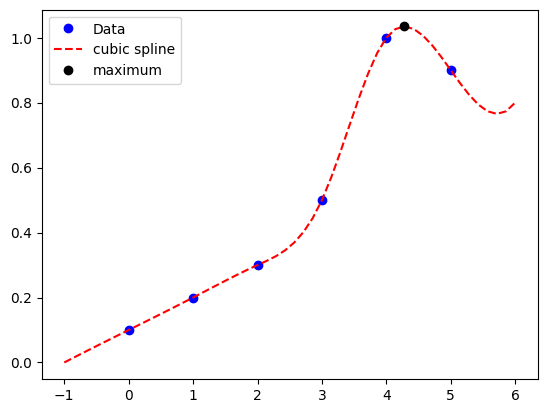

In [28]:
# 4: Cubic Spline in Python GEKKO
# https://www.youtube.com/watch?v=lZEI36_Bsv4&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=4

xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,1.0,0.9])

m = GEKKO(remote=False)
x = m.Param(value=np.linspace(-1,6))
y = m.Var()
m.cspline(x,y,xm,ym)
m.options.IMODE = 2
m.solve(disp=False)

p = GEKKO(remote=False)
px = p.Var(value=1,lb=0,ub=5)
py = p.Var()
p.Obj(-py)
p.cspline(px,py,xm,ym)
p.solve(disp=False)

plt.plot(xm,ym,'bo',label='Data')
plt.plot(x.VALUE,y.VALUE,'r--',label="cubic spline")
plt.plot(px,py,"ko",label="maximum")
plt.legend()
plt.show()

In [ ]:
# 5: Linear and Polynomial Regression
# https://www.youtube.com/watch?v=P7lHkcKrn1k&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=5

